# Merge_csv

In [3]:
import os
import glob
import pandas as pd
path = "C:/Users/Indrani B/Desktop/bootcamp/Ml_proj/test_data"

In [134]:
all_filenames = glob.glob(os.path.join(path, "WELL*.csv"))
#all_filenames

In [135]:
#df_from_each_file = (pd.read_csv(f, sep=',') for f in all_filenames)
#df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged = pd.concat([pd.read_csv(fp).assign(WELL_No=os.path.basename(fp)) for fp in all_filenames])
meged_file = df_merged.to_csv("merged.csv")

In [136]:
file = open("merged.csv")

numlines = len(file.readlines())

In [281]:
print("No. of instances:", numlines)

No. of instances: 2032442


# Preprocessing


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('C:/Users/Indrani B/Desktop/bootcamp/Ml_proj/test_data/merged.csv')
df.head()


,Unnamed: 0,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,WELL_No
0,0,2014-01-24 21:31:36.000000,0.0,18433410.0,116.9109,9366608.0,75.34820,-300917.8,NaN,0.0,0.0,WELL-00001_20140124213136.csv
1,1,2014-01-24 21:31:37.000000,0.0,18433410.0,116.9109,9366602.0,75.34825,-300917.8,NaN,0.0,0.0,WELL-00001_20140124213136.csv
2,2,2014-01-24 21:31:38.000000,0.0,18433410.0,116.9109,9366598.0,75.34831,-300917.8,NaN,0.0,0.0,WELL-00001_20140124213136.csv
3,3,2014-01-24 21:31:39.000000,0.0,18433410.0,116.9109,9366592.0,75.34837,-300917.8,NaN,0.0,0.0,WELL-00001_20140124213136.csv
4,4,2014-01-24 21:31:40.000000,0.0,18433410.0,116.9109,9366588.0,75.34843,-300917.8,NaN,0.0,0.0,WELL-00001_20140124213136.csv


In [5]:
df['WELL_No']

0          WELL-00001_20140124213136.csv
1          WELL-00001_20140124213136.csv
2          WELL-00001_20140124213136.csv
3          WELL-00001_20140124213136.csv
4          WELL-00001_20140124213136.csv
                       ...              
2032436    WELL-00021_20170509013517.csv
2032437    WELL-00021_20170509013517.csv
2032438    WELL-00021_20170509013517.csv
2032439    WELL-00021_20170509013517.csv
2032440    WELL-00021_20170509013517.csv
Name: WELL_No, Length: 2032441, dtype: object

In [6]:
#splitting column string
df[['WELL_No','Last']] = df.WELL_No.apply(lambda x: pd.Series(str(x).split("_"))) 

In [7]:
#splitting column string
df[['1st','WELL_No']] = df.WELL_No.apply(lambda x: pd.Series(str(x).split("WELL-"))) 

In [8]:
#plt.hist(well['class'])
#print(df["class"])
#type(df['class'].unique())
print(df['class'].unique())

[  0.  nan 101.   1. 107.   7.   4. 102.   2. 106.   6.   3. 105.   5.
 108.   8.]


In [9]:
df = df.drop(columns="1st")

In [10]:
df = df.drop(columns="Last")

In [11]:
df.head(-5)

,Unnamed: 0,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,WELL_No
0,0,2014-01-24 21:31:36.000000,0.000000e+00,1.843341e+07,116.910900,9366608.0,75.34820,-3.009178e+05,NaN,0.000000e+00,0.0,00001
1,1,2014-01-24 21:31:37.000000,0.000000e+00,1.843341e+07,116.910900,9366602.0,75.34825,-3.009178e+05,NaN,0.000000e+00,0.0,00001
2,2,2014-01-24 21:31:38.000000,0.000000e+00,1.843341e+07,116.910900,9366598.0,75.34831,-3.009178e+05,NaN,0.000000e+00,0.0,00001
3,3,2014-01-24 21:31:39.000000,0.000000e+00,1.843341e+07,116.910900,9366592.0,75.34837,-3.009178e+05,NaN,0.000000e+00,0.0,00001
4,4,2014-01-24 21:31:40.000000,0.000000e+00,1.843341e+07,116.910900,9366588.0,75.34843,-3.009178e+05,NaN,0.000000e+00,0.0,00001
...,...,...,...,...,...,...,...,...,...,...,...,...
2032431,24194,2017-05-09 08:18:31.000000,3.096646e+09,1.914609e+09,4.311329,3150674.0,NaN,1.579215e+09,NaN,1.157562e-09,8.0,00021
2032432,24195,2017-05-09 08:18:32.000000,3.096644e+09,1.913932e+09,4.311428,3150676.0,NaN,1.579158e+09,NaN,1.157520e-09,8.0,00021
2032433,24196,2017-05-09 08:18:33.000000,3.096642e+09,1.913256e+09,4.311527,3150677.0,NaN,1.579101e+09,NaN,1.157479e-09,8.0,00021
2032434,24197,2017-05-09 08:18:34.000000,3.096640e+09,1.912579e+09,4.311625,3150679.0,NaN,1.579044e+09,NaN,1.157438e-09,8.0,00021


In [12]:
class_type = df['class'].value_counts()

#class_type
type(df['class'].unique())

int_class = df['class'].unique().astype(str)
int_class

array(['0.0', 'nan', '101.0', '1.0', '107.0', '7.0', '4.0', '102.0',
       '2.0', '106.0', '6.0', '3.0', '105.0', '5.0', '108.0', '8.0'],
      dtype='<U32')

In [13]:
#class_type.plot(kind='box')

Text(0, 0.5, 'count')

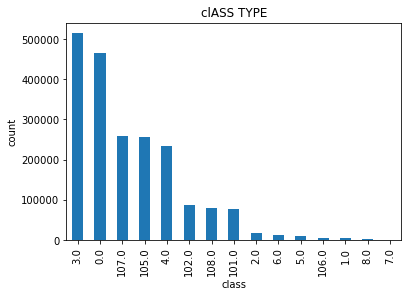

In [14]:
df['class'].value_counts().plot(kind='bar', title = 'clASS TYPE')
plt.xlabel('class', fontsize=10);
plt.ylabel('count', fontsize=10)

In [15]:
class_0 = df.loc[df['class'] == 0.0 ]
class_1 = df.loc[df['class'] == 1.0 ]
class_2 = df.loc[df['class'] == 2.0 ]
class_3= df.loc[df['class'] == 3.0 ]
class_4 = df.loc[df['class'] == 4.0 ]
class_5 = df.loc[df['class'] == 5.0 ]
class_6 = df.loc[df['class'] == 6.0 ]
class_7 = df.loc[df['class'] == 7.0 ]
class_8 = df.loc[df['class'] == 8.0 ]
class_101 = df.loc[df['class'] == 101.0 ]
class_102 = df.loc[df['class'] == 102.0 ]
class_105 = df.loc[df['class'] == 105.0 ]
class_106 = df.loc[df['class'] == 106.0 ]
class_107 = df.loc[df['class'] == 107.0 ]
class_108 = df.loc[df['class'] == 108.0 ]

In [16]:
class_1.shape

(5870, 12)

In [17]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [18]:
class_1.corr()

,Unnamed: 0,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
Unnamed: 0,1.000000,0.964228,0.619611,0.411786,-0.656208,-0.522639,-0.310027,NaN,NaN,NaN
P-PDG,0.964228,1.000000,0.566359,0.483116,-0.709814,-0.463029,-0.241823,NaN,NaN,NaN
P-TPT,0.619611,0.566359,1.000000,-0.398278,0.115648,-0.991941,-0.930655,NaN,NaN,NaN
T-TPT,0.411786,0.483116,-0.398278,1.000000,-0.955714,0.511006,0.705901,NaN,NaN,NaN
P-MON-CKP,-0.656208,-0.709814,0.115648,-0.955714,1.000000,-0.240325,-0.470906,NaN,NaN,NaN
T-JUS-CKP,-0.522639,-0.463029,-0.991941,0.511006,-0.240325,1.000000,0.969484,NaN,NaN,NaN
P-JUS-CKGL,-0.310027,-0.241823,-0.930655,0.705901,-0.470906,0.969484,1.000000,NaN,NaN,NaN
T-JUS-CKGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['timestamp']

0          2014-01-24 21:31:36.000000
1          2014-01-24 21:31:37.000000
2          2014-01-24 21:31:38.000000
3          2014-01-24 21:31:39.000000
4          2014-01-24 21:31:40.000000
                      ...            
2032436    2017-05-09 08:18:36.000000
2032437    2017-05-09 08:18:37.000000
2032438    2017-05-09 08:18:38.000000
2032439    2017-05-09 08:18:39.000000
2032440    2017-05-09 08:18:40.000000
Name: timestamp, Length: 2032441, dtype: object

In [20]:
#converting timestamp to datetime
datetime = pd.to_datetime(df['timestamp']).apply(lambda x: x.date())

In [21]:
class_1['timestamp'] =  pd.to_datetime(class_1['timestamp']).apply(lambda x: x.date())
class_2['timestamp'] =  pd.to_datetime(class_2['timestamp']).apply(lambda x: x.date())
class_3['timestamp'] =  pd.to_datetime(class_3['timestamp']).apply(lambda x: x.date())
class_4['timestamp'] =  pd.to_datetime(class_4['timestamp']).apply(lambda x: x.date())
class_5['timestamp'] =  pd.to_datetime(class_5['timestamp']).apply(lambda x: x.date())
class_6['timestamp'] =  pd.to_datetime(class_6['timestamp']).apply(lambda x: x.date())
class_7['timestamp'] =  pd.to_datetime(class_7['timestamp']).apply(lambda x: x.date())
class_8['timestamp'] =  pd.to_datetime(class_8['timestamp']).apply(lambda x: x.date())


class_0['timestamp'] =  pd.to_datetime(class_0['timestamp']).apply(lambda x: x.date())
class_101['timestamp'] =  pd.to_datetime(class_101['timestamp']).apply(lambda x: x.date())
class_102['timestamp'] =  pd.to_datetime(class_102['timestamp']).apply(lambda x: x.date())
class_105['timestamp'] =  pd.to_datetime(class_105['timestamp']).apply(lambda x: x.date())
class_106['timestamp'] =  pd.to_datetime(class_106['timestamp']).apply(lambda x: x.date())
class_107['timestamp'] =  pd.to_datetime(class_107['timestamp']).apply(lambda x: x.date())
class_108['timestamp'] =  pd.to_datetime(class_108['timestamp']).apply(lambda x: x.date())

<ipython-input-21-47484934c311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1['timestamp'] =  pd.to_datetime(class_1['timestamp']).apply(lambda x: x.date())
<ipython-input-21-47484934c311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_2['timestamp'] =  pd.to_datetime(class_2['timestamp']).apply(lambda x: x.date())
<ipython-input-21-47484934c311>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [22]:
class_0 = class_0.drop(columns="Unnamed: 0")


class_1 = class_1.drop(columns="Unnamed: 0")
class_2 = class_2.drop(columns="Unnamed: 0")
class_3 = class_3.drop(columns="Unnamed: 0")
class_4 = class_4.drop(columns="Unnamed: 0")
class_5 = class_5.drop(columns="Unnamed: 0")
class_6 = class_6.drop(columns="Unnamed: 0")
class_7 = class_7.drop(columns="Unnamed: 0")
class_8 = class_8.drop(columns="Unnamed: 0")

class_101 = class_101.drop(columns="Unnamed: 0")
class_102 = class_102.drop(columns="Unnamed: 0")
class_105 = class_105.drop(columns="Unnamed: 0")
class_106 = class_106.drop(columns="Unnamed: 0")
class_107 = class_107.drop(columns="Unnamed: 0")
class_108 = class_108.drop(columns="Unnamed: 0")

In [23]:
class_101

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,WELL_No
1016,2014-01-24,0.000000e+00,18428820.0,116.9109,9265374.0,75.40653,-300917.8,NaN,0.0,101.0,00001
1017,2014-01-24,0.000000e+00,18428620.0,116.9109,9261805.0,75.40659,-300917.8,NaN,0.0,101.0,00001
1018,2014-01-24,0.000000e+00,18428420.0,116.9109,9258237.0,75.40665,-300917.8,NaN,0.0,101.0,00001
1019,2014-01-24,0.000000e+00,18428220.0,116.9109,9254668.0,75.40670,-300917.8,NaN,0.0,101.0,00001
1020,2014-01-24,0.000000e+00,18428020.0,116.9109,9251099.0,75.40676,-300917.8,NaN,0.0,101.0,00001
...,...,...,...,...,...,...,...,...,...,...,...
605240,2018-06-18,-1.180116e+42,20619450.0,118.2390,9992133.0,71.26657,4108511.0,NaN,0.0,101.0,00006
605241,2018-06-18,-1.180116e+42,20619480.0,118.2390,9992676.0,71.26487,4108512.0,NaN,0.0,101.0,00006
605242,2018-06-18,-1.180116e+42,20619520.0,118.2390,9993218.0,71.26317,4108512.0,NaN,0.0,101.0,00006
605243,2018-06-18,-1.180116e+42,20619550.0,118.2390,9993761.0,71.26147,4108512.0,NaN,0.0,101.0,00006


In [24]:
#class_1 = class_1.drop(columns="P-JUS-CKGL")

In [25]:
#class_3.head(2)

In [26]:
final_class = class_1.append(class_2).append(class_3).append(class_4).append(class_5).append(class_6). \
              append(class_7).append(class_8)

In [27]:
final_class['year'] = pd.DatetimeIndex(final_class['timestamp']).year
final_class['class'] = final_class['class'].astype('int64')
final_class['class'].dtype

dtype('int64')

# EDA

In [28]:
final_class.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,year
count,7.969090e+05,7.969090e+05,796909.000000,7.832530e+05,779570.000000,7.809730e+05,0.0,781935.000000,797490.000000,797490.000000
mean,2.406340e+07,1.825469e+07,70.136117,3.429392e+06,48.456592,2.066310e+07,NaN,0.877096,3.352898,2016.672492
std,1.136296e+08,7.997818e+07,33.480844,2.218725e+06,36.347336,1.046656e+08,NaN,0.681865,0.722607,1.071336
min,-5.068086e+06,0.000000e+00,0.000000,-8.317492e+03,-2.020000,-3.009178e+05,NaN,0.000000,1.000000,2012.000000
25%,0.000000e+00,1.395115e+07,47.392800,1.390447e+06,28.503850,3.890555e+06,NaN,0.000000,3.000000,2017.000000
50%,2.394543e+07,1.447060e+07,55.823830,2.382491e+06,32.202780,1.941998e+07,NaN,1.141351,3.000000,2017.000000
75%,2.437595e+07,1.578415e+07,116.753300,5.995457e+06,68.654880,1.967319e+07,NaN,1.434921,4.000000,2017.000000
max,3.100656e+09,1.978446e+09,119.410800,9.034984e+06,173.096100,1.829582e+09,NaN,2.623792,8.000000,2018.000000


In [29]:
nulls = final_class.isnull().sum()
nulls[nulls > 0]

P-PDG            581
P-TPT            581
T-TPT            581
P-MON-CKP      14237
T-JUS-CKP      17920
P-JUS-CKGL     16517
T-JUS-CKGL    797490
QGL            15555
dtype: int64

In [30]:
final_class['P-PDG'] = final_class['P-PDG'].fillna(final_class['P-PDG'].mean())
final_class['P-TPT'] = final_class['P-TPT'].fillna(final_class['P-TPT'].mean())

final_class['T-TPT'] = final_class['T-TPT'].fillna(final_class['T-TPT'].mean())
final_class['P-MON-CKP'] = final_class['P-MON-CKP'].fillna(final_class['P-MON-CKP'].mean())

final_class['T-JUS-CKP'] = final_class['T-JUS-CKP'].fillna(final_class['T-JUS-CKP'].mean())
final_class['P-JUS-CKGL'] = final_class['P-JUS-CKGL'].fillna(final_class['P-JUS-CKGL'].mean())

final_class['T-JUS-CKGL'] = final_class['T-JUS-CKGL'].fillna(final_class['T-JUS-CKGL'].mean())
final_class['QGL'] = final_class['QGL'].fillna(final_class['QGL'].mean())

In [31]:
#replacing Nan with 0
final_class = final_class.fillna(0)

In [32]:
final_class.head(-5)

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,WELL_No,year
10724,2014-01-25,0.000000e+00,1.747517e+07,117.569200,7950480.0,79.028330,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10725,2014-01-25,0.000000e+00,1.747485e+07,117.569800,7950480.0,79.028380,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10726,2014-01-25,0.000000e+00,1.747452e+07,117.570400,7950480.0,79.028430,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10727,2014-01-25,0.000000e+00,1.747419e+07,117.571100,7950480.0,79.028470,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10728,2014-01-25,0.000000e+00,1.747386e+07,117.571700,7950480.0,79.028530,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
2032431,2017-05-09,3.096646e+09,1.914609e+09,4.311329,3150674.0,48.456592,1.579215e+09,0.0,1.157562e-09,8,00021,2017
2032432,2017-05-09,3.096644e+09,1.913932e+09,4.311428,3150676.0,48.456592,1.579158e+09,0.0,1.157520e-09,8,00021,2017
2032433,2017-05-09,3.096642e+09,1.913256e+09,4.311527,3150677.0,48.456592,1.579101e+09,0.0,1.157479e-09,8,00021,2017
2032434,2017-05-09,3.096640e+09,1.912579e+09,4.311625,3150679.0,48.456592,1.579044e+09,0.0,1.157438e-09,8,00021,2017


In [33]:
nulls1 = final_class.isnull().sum()
nulls1[nulls > 0]

P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
T-JUS-CKGL    0
QGL           0
dtype: int64

In [34]:
final_class.shape

(797490, 12)

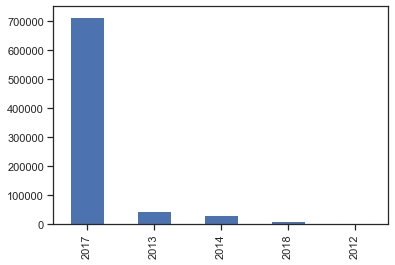

In [35]:
final_class['year'].value_counts().plot(kind='bar');

In [36]:
final_class.loc[:, ["class", "year"]]

,class,year
10724,1,2014
10725,1,2014
10726,1,2014
10727,1,2014
10728,1,2014
...,...,...
2032436,8,2017
2032437,8,2017
2032438,8,2017
2032439,8,2017


In [37]:
final_class.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)

In [38]:
final_class = final_class.drop(columns="timestamp")

In [39]:
final_class

,P-sensor1,P-sensor2,T-sensor1,P-sensor3,T-sensor2,P-sensor4,T-sensor3,P-sensor5,class,WELL_No,year
10724,0.000000e+00,1.747517e+07,117.569200,7950480.0,79.028330,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10725,0.000000e+00,1.747485e+07,117.569800,7950480.0,79.028380,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10726,0.000000e+00,1.747452e+07,117.570400,7950480.0,79.028430,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10727,0.000000e+00,1.747419e+07,117.571100,7950480.0,79.028470,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
10728,0.000000e+00,1.747386e+07,117.571700,7950480.0,79.028530,-3.009178e+05,0.0,0.000000e+00,1,00001,2014
...,...,...,...,...,...,...,...,...,...,...,...
2032436,3.096636e+09,1.911335e+09,4.311784,3150682.0,48.456592,1.578930e+09,0.0,1.157355e-09,8,00021,2017
2032437,3.096634e+09,1.910712e+09,4.311864,3150684.0,48.456592,1.578874e+09,0.0,1.157314e-09,8,00021,2017
2032438,3.096632e+09,1.910090e+09,4.311943,3150685.0,48.456592,1.578817e+09,0.0,1.157273e-09,8,00021,2017
2032439,3.096630e+09,1.909468e+09,4.312023,3150687.0,48.456592,1.578760e+09,0.0,1.157232e-09,8,00021,2017


In [40]:
final_class['WELL_No'] = final_class['WELL_No'].astype('int64')
final_class['WELL_No'].dtype

dtype('int64')

Text(0, 0.5, 'count')

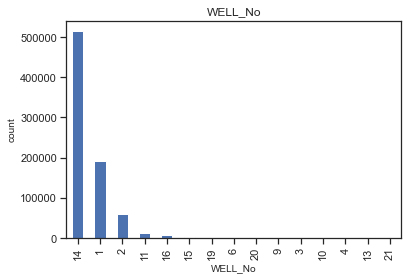

In [41]:
final_class['WELL_No'].value_counts().plot(kind='bar', title = 'WELL_No')
plt.xlabel('WELL_No', fontsize=10);
plt.ylabel('count', fontsize=10)

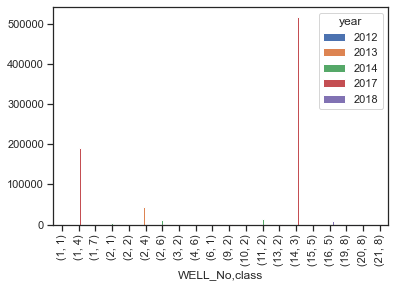

In [42]:
df_final_class = final_class.groupby(['WELL_No', 'year', 'class']).size().unstack(level=1)
df_final_class.plot(kind = 'bar')

# class_0 - Regular (No event)

In [43]:

class_0

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,WELL_No
0,2014-01-24,0.000000e+00,18433410.0,116.91090,9366608.0,75.34820,-3.009178e+05,NaN,0.000000,0.0,00001
1,2014-01-24,0.000000e+00,18433410.0,116.91090,9366602.0,75.34825,-3.009178e+05,NaN,0.000000,0.0,00001
2,2014-01-24,0.000000e+00,18433410.0,116.91090,9366598.0,75.34831,-3.009178e+05,NaN,0.000000,0.0,00001
3,2014-01-24,0.000000e+00,18433410.0,116.91090,9366592.0,75.34837,-3.009178e+05,NaN,0.000000,0.0,00001
4,2014-01-24,0.000000e+00,18433410.0,116.91090,9366588.0,75.34843,-3.009178e+05,NaN,0.000000,0.0,00001
...,...,...,...,...,...,...,...,...,...,...,...
2011749,2017-05-09,3.077878e+09,884358400.0,19.05132,1660601.0,NaN,1.391214e+09,NaN,0.058183,0.0,00021
2011750,2017-05-09,3.077878e+09,884327000.0,19.05428,1658604.0,NaN,1.391382e+09,NaN,0.058288,0.0,00021
2011751,2017-05-09,3.077878e+09,884295500.0,19.05724,1656607.0,NaN,1.391549e+09,NaN,0.058393,0.0,00021
2011752,2017-05-09,3.077878e+09,884264100.0,19.06020,1654610.0,NaN,1.391717e+09,NaN,0.058498,0.0,00021


In [44]:
class_0['year'] = pd.DatetimeIndex(class_0['timestamp']).year
class_0['class'] = class_0['class'].astype('int64')
class_0['class'].dtype

dtype('int64')

In [45]:
nulls = class_0.isnull().sum()
nulls[nulls > 0]

P-PDG            616
P-TPT            616
T-TPT            616
P-MON-CKP     212230
T-JUS-CKP     228718
P-JUS-CKGL    226345
T-JUS-CKGL    464320
QGL           224040
dtype: int64

In [46]:
class_0['P-PDG'] = class_0['P-PDG'].fillna(class_0['P-PDG'].mean())
class_0['P-TPT'] = class_0['P-TPT'].fillna(class_0['P-TPT'].mean())

class_0['T-TPT'] = class_0['T-TPT'].fillna(class_0['T-TPT'].mean())
class_0['P-MON-CKP'] = class_0['P-MON-CKP'].fillna(class_0['P-MON-CKP'].mean())

class_0['T-JUS-CKP'] = class_0['T-JUS-CKP'].fillna(class_0['T-JUS-CKP'].mean())
class_0['P-JUS-CKGL'] = class_0['P-JUS-CKGL'].fillna(class_0['P-JUS-CKGL'].mean())

class_0['T-JUS-CKGL'] = class_0['T-JUS-CKGL'].fillna(class_0['T-JUS-CKGL'].mean())
class_0['QGL'] = class_0['QGL'].fillna(class_0['QGL'].mean())

In [47]:
#replacing Nan with 0
class_0 = class_0.fillna(0)

In [48]:
nulls1 = class_0.isnull().sum()
nulls1[nulls > 0]

P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
T-JUS-CKGL    0
QGL           0
dtype: int64

In [49]:
class_0.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)

In [50]:
class_0 = class_0.drop(columns="timestamp")

In [51]:
class_0

,P-sensor1,P-sensor2,T-sensor1,P-sensor3,T-sensor2,P-sensor4,T-sensor3,P-sensor5,class,WELL_No,year
0,0.000000e+00,18433410.0,116.91090,9366608.0,75.348200,-3.009178e+05,0.0,0.000000,0,00001,2014
1,0.000000e+00,18433410.0,116.91090,9366602.0,75.348250,-3.009178e+05,0.0,0.000000,0,00001,2014
2,0.000000e+00,18433410.0,116.91090,9366598.0,75.348310,-3.009178e+05,0.0,0.000000,0,00001,2014
3,0.000000e+00,18433410.0,116.91090,9366592.0,75.348370,-3.009178e+05,0.0,0.000000,0,00001,2014
4,0.000000e+00,18433410.0,116.91090,9366588.0,75.348430,-3.009178e+05,0.0,0.000000,0,00001,2014
...,...,...,...,...,...,...,...,...,...,...,...
2011749,3.077878e+09,884358400.0,19.05132,1660601.0,79.311388,1.391214e+09,0.0,0.058183,0,00021,2017
2011750,3.077878e+09,884327000.0,19.05428,1658604.0,79.311388,1.391382e+09,0.0,0.058288,0,00021,2017
2011751,3.077878e+09,884295500.0,19.05724,1656607.0,79.311388,1.391549e+09,0.0,0.058393,0,00021,2017
2011752,3.077878e+09,884264100.0,19.06020,1654610.0,79.311388,1.391717e+09,0.0,0.058498,0,00021,2017


In [52]:
class_0.groupby(['WELL_No','year'].size().plot(kind='bar', title = 'WELL_No ¦ year')
plt.xlabel('WELL_No', fontsize=10);
plt.ylabel('count', fontsize=10)

SyntaxError: invalid syntax (<ipython-input-52-960b831f4383>, line 2)

In [ ]:
df_class_0 = class_0.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_0.plot(kind = 'bar')

# class_101 

In [ ]:
class_101

In [ ]:
class_101['year'] = pd.DatetimeIndex(class_101['timestamp']).year
class_101['class'] = class_101['class'].astype('int64')
class_101['class'].dtype

In [ ]:
nulls = class_101.isnull().sum()
nulls[nulls > 0]

In [ ]:
class_101['P-PDG'] = class_101['P-PDG'].fillna(class_101['P-PDG'].mean())
class_101['P-TPT'] = class_101['P-TPT'].fillna(class_101['P-TPT'].mean())

class_101['T-TPT'] = class_101['T-TPT'].fillna(class_101['T-TPT'].mean())
class_101['P-MON-CKP'] = class_101['P-MON-CKP'].fillna(class_101['P-MON-CKP'].mean())

class_101['T-JUS-CKP'] = class_101['T-JUS-CKP'].fillna(class_101['T-JUS-CKP'].mean())
class_101['P-JUS-CKGL'] = class_101['P-JUS-CKGL'].fillna(class_101['P-JUS-CKGL'].mean())

class_101['T-JUS-CKGL'] = class_101['T-JUS-CKGL'].fillna(class_101['T-JUS-CKGL'].mean())
class_101['QGL'] = class_101['QGL'].fillna(class_101['QGL'].mean())

In [ ]:
#replacing Nan with 0
class_101 = class_101.fillna(0)

In [ ]:
nulls1 = class_101.isnull().sum()
nulls1[nulls > 0]

In [ ]:
class_101.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)
class_101 = class_101.drop(columns="timestamp")

In [ ]:
class_101

In [ ]:
df_class_101 = class_101.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_101.plot(kind = 'bar')

# class_102

In [ ]:
class_102

In [ ]:
class_102['year'] = pd.DatetimeIndex(class_102['timestamp']).year
class_102['class'] = class_102['class'].astype('int64')
class_102['class'].dtype

In [ ]:
nulls = class_102.isnull().sum()
nulls[nulls > 0]

class_102['P-PDG'] = class_102['P-PDG'].fillna(class_102['P-PDG'].mean())
class_102['P-TPT'] = class_102['P-TPT'].fillna(class_102['P-TPT'].mean())

class_102['T-TPT'] = class_102['T-TPT'].fillna(class_102['T-TPT'].mean())
class_102['P-MON-CKP'] = class_102['P-MON-CKP'].fillna(class_102['P-MON-CKP'].mean())

class_102['T-JUS-CKP'] = class_102['T-JUS-CKP'].fillna(class_102['T-JUS-CKP'].mean())
class_102['P-JUS-CKGL'] = class_102['P-JUS-CKGL'].fillna(class_102['P-JUS-CKGL'].mean())

class_102['T-JUS-CKGL'] = class_102['T-JUS-CKGL'].fillna(class_102['T-JUS-CKGL'].mean())
class_102['QGL'] = class_102['QGL'].fillna(class_102['QGL'].mean())

#replacing Nan with 0
class_102 = class_102.fillna(0)

nulls1 = class_102.isnull().sum()
nulls1[nulls > 0]

class_102.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)
class_102 = class_102.drop(columns="timestamp")

In [ ]:
class_102

In [ ]:
df_class_102 = class_102.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_102.plot(kind = 'bar')

# class_105

In [ ]:
class_105['year'] = pd.DatetimeIndex(class_105['timestamp']).year
class_105['class'] = class_105['class'].astype('int64')
class_105['class'].dtype

nulls = class_105.isnull().sum()
nulls[nulls > 0]

class_105['P-PDG'] = class_105['P-PDG'].fillna(class_105['P-PDG'].mean())
class_105['P-TPT'] = class_105['P-TPT'].fillna(class_105['P-TPT'].mean())

class_105['T-TPT'] = class_105['T-TPT'].fillna(class_105['T-TPT'].mean())
class_105['P-MON-CKP'] = class_105['P-MON-CKP'].fillna(class_105['P-MON-CKP'].mean())

class_105['T-JUS-CKP'] = class_105['T-JUS-CKP'].fillna(class_105['T-JUS-CKP'].mean())
class_105['P-JUS-CKGL'] = class_105['P-JUS-CKGL'].fillna(class_105['P-JUS-CKGL'].mean())

class_105['T-JUS-CKGL'] = class_105['T-JUS-CKGL'].fillna(class_105['T-JUS-CKGL'].mean())
class_105['QGL'] = class_105['QGL'].fillna(class_105['QGL'].mean())

#replacing Nan with 0
class_105 = class_105.fillna(0)

nulls1 = class_105.isnull().sum()
nulls1[nulls > 0]

class_105.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)
class_105 = class_105.drop(columns="timestamp")

In [ ]:
df_class_105 = class_105.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_105.plot(kind = 'bar')

# class_106

In [ ]:
class_106['year'] = pd.DatetimeIndex(class_106['timestamp']).year
class_106['class'] = class_106['class'].astype('int64')
class_106['class'].dtype

nulls = class_106.isnull().sum()
nulls[nulls > 0]

class_106['P-PDG'] = class_106['P-PDG'].fillna(class_106['P-PDG'].mean())
class_106['P-TPT'] = class_106['P-TPT'].fillna(class_106['P-TPT'].mean())

class_106['T-TPT'] = class_106['T-TPT'].fillna(class_106['T-TPT'].mean())
class_106['P-MON-CKP'] = class_106['P-MON-CKP'].fillna(class_106['P-MON-CKP'].mean())

class_106['T-JUS-CKP'] = class_106['T-JUS-CKP'].fillna(class_106['T-JUS-CKP'].mean())
class_106['P-JUS-CKGL'] = class_106['P-JUS-CKGL'].fillna(class_106['P-JUS-CKGL'].mean())

class_106['T-JUS-CKGL'] = class_106['T-JUS-CKGL'].fillna(class_106['T-JUS-CKGL'].mean())
class_106['QGL'] = class_106['QGL'].fillna(class_106['QGL'].mean())

#replacing Nan with 0
class_106 = class_106.fillna(0)

nulls1 = class_106.isnull().sum()
nulls1[nulls > 0]

class_106.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)
class_106 = class_106.drop(columns="timestamp")

In [ ]:
class_106

In [ ]:
df_class_106 = class_106.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_106.plot(kind = 'bar')

# class_107

In [ ]:
class_107['year'] = pd.DatetimeIndex(class_107['timestamp']).year
class_107['class'] = class_107['class'].astype('int64')
class_107['class'].dtype

nulls = class_107.isnull().sum()
nulls[nulls > 0]

class_107['P-PDG'] = class_107['P-PDG'].fillna(class_107['P-PDG'].mean())
class_107['P-TPT'] = class_107['P-TPT'].fillna(class_107['P-TPT'].mean())

class_107['T-TPT'] = class_107['T-TPT'].fillna(class_107['T-TPT'].mean())
class_107['P-MON-CKP'] = class_107['P-MON-CKP'].fillna(class_107['P-MON-CKP'].mean())

class_107['T-JUS-CKP'] = class_107['T-JUS-CKP'].fillna(class_107['T-JUS-CKP'].mean())
class_107['P-JUS-CKGL'] = class_107['P-JUS-CKGL'].fillna(class_107['P-JUS-CKGL'].mean())

class_107['T-JUS-CKGL'] = class_107['T-JUS-CKGL'].fillna(class_107['T-JUS-CKGL'].mean())
class_107['QGL'] = class_107['QGL'].fillna(class_107['QGL'].mean())

#replacing Nan with 0
class_107 = class_107.fillna(0)

nulls1 = class_107.isnull().sum()
nulls1[nulls > 0]

class_107.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)
class_107 = class_107.drop(columns="timestamp")

In [ ]:
df_class_107 = class_107.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_107.plot(kind = 'bar')

# class_108

In [ ]:
class_108['year'] = pd.DatetimeIndex(class_108['timestamp']).year
class_108['class'] = class_108['class'].astype('int64')
class_108['class'].dtype

nulls = class_108.isnull().sum()
nulls[nulls > 0]

class_108['P-PDG'] = class_108['P-PDG'].fillna(class_108['P-PDG'].mean())
class_108['P-TPT'] = class_108['P-TPT'].fillna(class_108['P-TPT'].mean())

class_108['T-TPT'] = class_108['T-TPT'].fillna(class_108['T-TPT'].mean())
class_108['P-MON-CKP'] = class_108['P-MON-CKP'].fillna(class_108['P-MON-CKP'].mean())

class_108['T-JUS-CKP'] = class_108['T-JUS-CKP'].fillna(class_108['T-JUS-CKP'].mean())
class_108['P-JUS-CKGL'] = class_108['P-JUS-CKGL'].fillna(class_108['P-JUS-CKGL'].mean())

class_108['T-JUS-CKGL'] = class_108['T-JUS-CKGL'].fillna(class_108['T-JUS-CKGL'].mean())
class_108['QGL'] = class_108['QGL'].fillna(class_108['QGL'].mean())

#replacing Nan with 0
class_108 = class_108.fillna(0)

nulls1 = class_108.isnull().sum()
nulls1[nulls > 0]

class_108.rename(columns={'P-PDG': 'P-sensor1', 'P-TPT': 'P-sensor2', 'T-TPT': 'T-sensor1', \
                            'P-MON-CKP': 'P-sensor3', 'T-JUS-CKP': 'T-sensor2', 'P-JUS-CKGL': 'P-sensor4'\
                             , 'T-JUS-CKGL': 'T-sensor3', 'QGL': 'P-sensor5'}, inplace=True)
class_108 = class_108.drop(columns="timestamp")

In [ ]:
df_class_108 = class_108.groupby(['WELL_No', 'year']).size().unstack(level=1)
df_class_108.plot(kind = 'bar')

In [ ]:
mega_class = final_class.append(class_101).append(class_102).append(class_105). \
              append(class_106).append(class_107).append(class_108)

In [ ]:
nulls = mega_class.isnull().sum()
nulls[nulls > 0]

In [ ]:
sns.scatterplot(x="year", y="WELL_No", data=final_class, hue="class",size="class")

In [ ]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [54]:
!conda install python-graphviz --yes

Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
import graphviz
from sklearn.tree import export_graphviz


# Random Forest

In [220]:
features = ['P-sensor1', 'P-sensor2', 'P-sensor3', 'P-sensor4', 'T-sensor1', 'T-sensor2', 'T-sensor3']

X = pd.get_dummies(final_class[features], drop_first=True)

y = final_class['WELL_No']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [222]:
len(X_train), len(X_test)

(534318, 263172)

In [223]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print('Train score:', accuracy_score(y_train, y_pred_train))
print('Test score:', accuracy_score(y_test, y_pred))

Train score: 0.9993711609940148
Test score: 0.9993654340127369


In [224]:
#num_trees = range(1, 75)
#scores = []

#for n in num_trees:
 #   model = RandomForestClassifier(n_estimators=n, random_state=42)
  #  model.fit(X_train, y_train)
  #  y_pred = model.predict(X_test)
 #   scores.append(accuracy_score(y_test, y_pred))

In [225]:
#plt.plot(num_trees, scores);

In [226]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9999962002036691

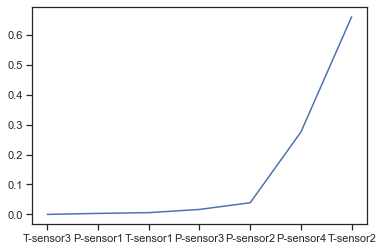

In [227]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='line');

In [228]:
confusion_matrix(y_test, y_pred)

array([[ 63676,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,  19307,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,    281,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,    171,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,    381,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,    359,      0,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,    265,      0,
             0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,  

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

print('Logistic Regression', lr.score(X_test, y_test))
print('Decision Tree', dt.score(X_test, y_test))

C:\Users\Indrani B\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.9714787287401395
Decision Tree 0.9999962002036691


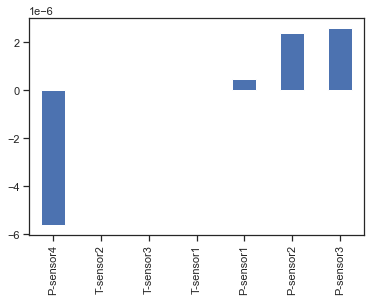

In [230]:
pd.Series(lr.coef_[0], index=X.columns).sort_values().plot(kind='bar');

In [232]:
!pip install pandas-profiling[notebook]

In [292]:
from pandas_profiling  import ProfileReport

#pandas_profiling._version_

profile = ProfileReport(final_class, title = 'pandas profiling report')

profile.to_widgets()

In [234]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

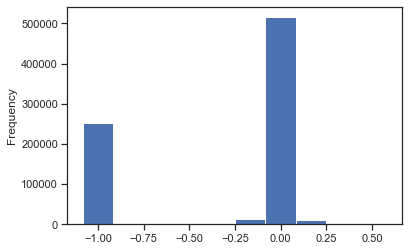

In [238]:
scaler = RobustScaler()

pd.Series(scaler.fit_transform(final_class[['WELL_No']]).flatten()).plot(kind='hist');

# Xgboost 

In [248]:
!pip install xgboost

In [249]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [251]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [252]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:39:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [253]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.898173


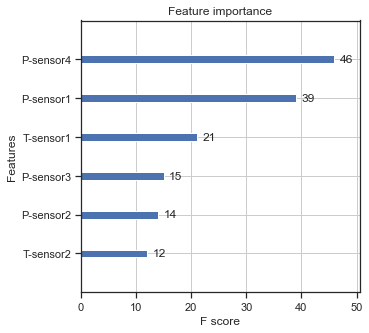

In [256]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [288]:
X_copy = final_class.drop(columns='P-sensor5')
y_copy = final_class['WELL_No']

X_train, X_test, y_train, y_test = train_test_split(X_copy,y_copy,test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     63430
           2       1.00      1.00      1.00     19239
           3       1.00      1.00      1.00       287
           4       1.00      1.00      1.00       183
           6       1.00      1.00      1.00       389
           9       1.00      1.00      1.00       350
          10       1.00      1.00      1.00       267
          11       1.00      1.00      1.00      4385
          13       1.00      1.00      1.00       167
          14       1.00      1.00      1.00    170096
          15       1.00      1.00      1.00       835
          16       1.00      1.00      1.00      2590
          19       1.00      1.00      1.00       436
          20       1.00      1.00      1.00       372
          21       1.00      1.00      1.00       146

    accuracy                           1.00    263172
   macro avg       1.00      1.00      1.00    263172
weighted avg       1.00   

In [287]:
X_copy = final_class.drop(columns='P-sensor5')
y_copy = final_class['class']

X_train, X_test, y_train, y_test = train_test_split(X_copy,y_copy,test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1963
           2       1.00      1.00      1.00      5494
           3       1.00      1.00      1.00    170291
           4       1.00      1.00      1.00     76596
           5       1.00      1.00      1.00      3259
           6       1.00      1.00      1.00      4304
           7       1.00      1.00      1.00       278
           8       1.00      1.00      1.00       987

    accuracy                           1.00    263172
   macro avg       1.00      1.00      1.00    263172
weighted avg       1.00      1.00      1.00    263172



In [239]:
X_copy = final_class.drop(columns='T-sensor1')
y_copy = final_class['year']

X_train, X_test, y_train, y_test = train_test_split(X_copy,y_copy,test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        2012       1.00      1.00      1.00       367
        2013       1.00      1.00      1.00     14439
        2014       1.00      1.00      1.00      9891
        2017       1.00      1.00      1.00    235766
        2018       1.00      1.00      1.00      2709

    accuracy                           1.00    263172
   macro avg       1.00      1.00      1.00    263172
weighted avg       1.00      1.00      1.00    263172



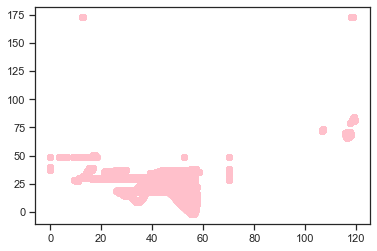

In [366]:
plt.scatter(final_class['T-sensor1'], final_class['T-sensor2'], c='pink')

C:\Users\Indrani B\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Indrani B\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Indrani B\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Indrani B\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Indrani B\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


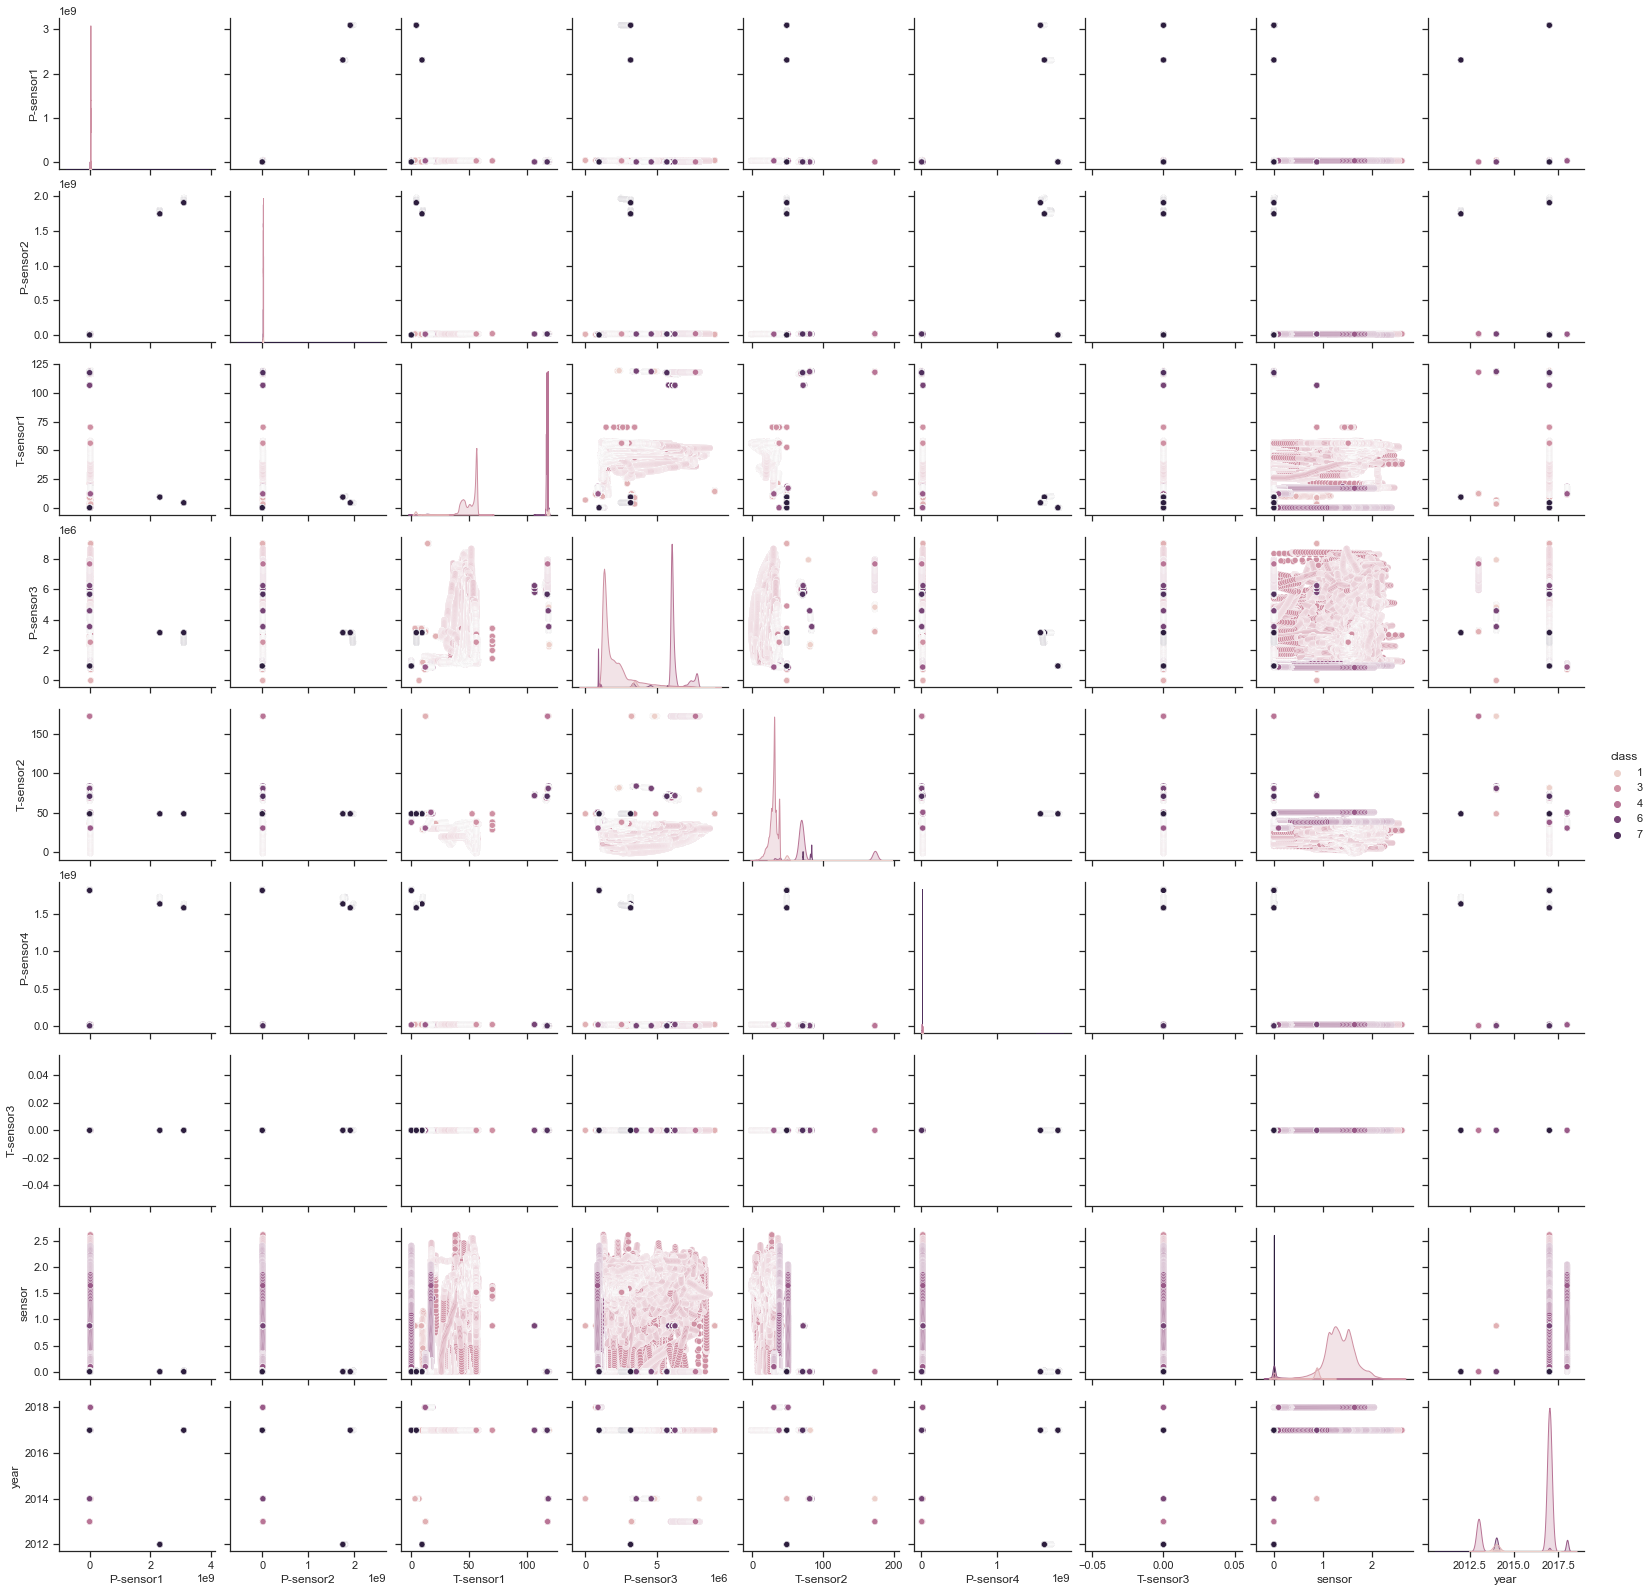

In [368]:
sns.pairplot(final_class, hue = 'class')

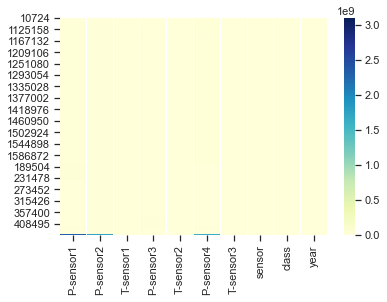

In [372]:
ax = sns.heatmap(final_class, cmap="YlGnBu")

In [380]:
!pip install scikit-plot

# KNN

In [381]:

from scikitplot.metrics import plot_silhouette

In [382]:

from sklearn.cluster import KMeans
from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette

In [383]:
model = KMeans(4)

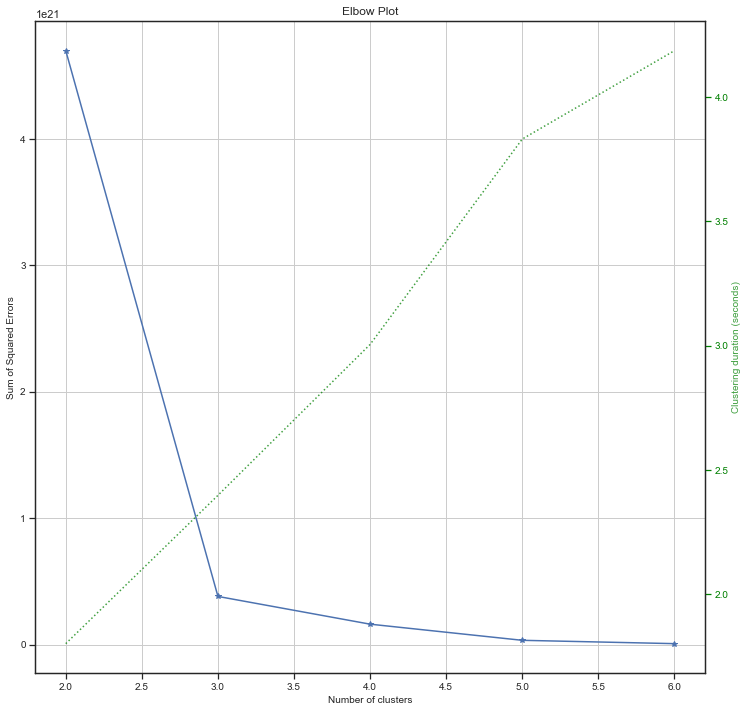

In [384]:
plot_elbow_curve(model,final_class,cluster_ranges=range(2,7),figsize=(12,12))

In [385]:
model.fit(final_class)

KMeans(n_clusters=4)

In [386]:
model.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [387]:
model = KMeans(3,random_state=42)
model.fit(final_class)

KMeans(n_clusters=3, random_state=42)

In [388]:
len(model.labels_)

797490

In [54]:
# Scatter and density plots
def plotScatterMatrix(final_class, plotSize, textSize):
    final_class = final_class.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    final_class = final_class.dropna('columns')
    final_class = final_class[[col for col in final_class if final_class[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    final_class = final_class[columnNames]
    ax = pd.plotting.scatter_matrix(final_class, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = final_class.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [55]:
plotScatterMatrix(final_class, 20, 10)

KeyError: "None of [Index(['Unnamed: 0', 'timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP',\n       'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL'],\n      dtype='object')] are in the [columns]"

In [56]:

final_class.head(-5)

,P-sensor1,P-sensor2,T-sensor1,P-sensor3,T-sensor2,P-sensor4,T-sensor3,P-sensor5,class,WELL_No,year
10724,0.000000e+00,1.747517e+07,117.569200,7950480.0,79.028330,-3.009178e+05,0.0,0.000000e+00,1,1,2014
10725,0.000000e+00,1.747485e+07,117.569800,7950480.0,79.028380,-3.009178e+05,0.0,0.000000e+00,1,1,2014
10726,0.000000e+00,1.747452e+07,117.570400,7950480.0,79.028430,-3.009178e+05,0.0,0.000000e+00,1,1,2014
10727,0.000000e+00,1.747419e+07,117.571100,7950480.0,79.028470,-3.009178e+05,0.0,0.000000e+00,1,1,2014
10728,0.000000e+00,1.747386e+07,117.571700,7950480.0,79.028530,-3.009178e+05,0.0,0.000000e+00,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...
2032431,3.096646e+09,1.914609e+09,4.311329,3150674.0,48.456592,1.579215e+09,0.0,1.157562e-09,8,21,2017
2032432,3.096644e+09,1.913932e+09,4.311428,3150676.0,48.456592,1.579158e+09,0.0,1.157520e-09,8,21,2017
2032433,3.096642e+09,1.913256e+09,4.311527,3150677.0,48.456592,1.579101e+09,0.0,1.157479e-09,8,21,2017
2032434,3.096640e+09,1.912579e+09,4.311625,3150679.0,48.456592,1.579044e+09,0.0,1.157438e-09,8,21,2017
